In [176]:
# read data
import numpy as np
import pandas as pd
from gmplot import gmplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
pd.set_option('max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = 12, 10

df = pd.read_csv('crime.txt')
df.columns = ['agency', 'crime', 'time', 'addr', 'zip', 'community']

In [193]:
def check_SD_lat_lon(lat, lon):
    if(lat >= 32 and lat <= 33.4) and (lon>= -118 and lon <= -115):
        return True
    else:
        return False
    
def isvalid(zipcode):
    from uszipcode import ZipcodeSearchEngine
    search = ZipcodeSearchEngine()
    if zipcode < 90000 or zipcode > 99999 or zipcode == 91980:
        return False;
    lat = search.by_zipcode(zipcode)['Latitude']
    lon = search.by_zipcode(zipcode)['Longitude']
    return check_SD_lat_lon(lat, lon) 

           
def get_xy_crimeRate_popDensity(df):
    from uszipcode import ZipcodeSearchEngine
    search = ZipcodeSearchEngine()
    
    crimeRate = []
    annual_wage = []
    population_dens = []
    valid_zip = df['zip'].unique().astype(np.int)
    crime_num = df.groupby(['zip']).size()
    for i in valid_zip:
        if(isvalid(i) == False):
            continue
        else:
            wage = search.by_zipcode(i)['Wealthy']
            population_den = search.by_zipcode(i)['Density']
            rate = crime_num.get(i)/180.0
            if wage == None:
                continue
            if(rate > 20):
                print("highest rate: ", i, "rate: ", rate, ", wage: ", wage, " pop desity: ", population_den)
            if(population_den > 12000):
                print("highest density: ", i, "rate: ", rate, ", wage: ", wage, " pop desity: ", population_den)
            if(population_den > 10000 and rate < 4):
                print("low wage and low crime: ", i, "rate: ", rate, ", wage: ", wage, " pop desity: ", population_den)
            annual_wage.append(int(wage)*0.01)
            crimeRate.append(rate)
            population_dens.append(population_den)
            #print(curr_population)
    plt.scatter(crimeRate, population_dens, s = annual_wage, alpha = 0.4)
    plt.xlabel('Crime Numbers (times / day)')
    plt.ylabel('Population Density (people / km$^2$)')
    for income in [10000, 20000, 40000]:
        plt.scatter([], [], c='k', alpha=0.4, s=income*0.01, label=str(income) + ' $ / year')
    plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='Annual wage')
    plt.title('Crime Rate and Population Density for San Diego Area Zipcodes')
    plt.show()
        
        
        

('highest rate: ', 92101, 'rate: ', 22.016666666666666, ', wage: ', 25389.78048254482, ' pop desity: ', 7859.110169491526)
('low wage and low crime: ', 91932, 'rate: ', 3.261111111111111, ', wage: ', 13460.910024107627, ' pop desity: ', 10246.21513944223)
('highest density: ', 92105, 'rate: ', 6.888888888888889, ', wage: ', 8984.35444687952, ' pop desity: ', 12533.752244165169)


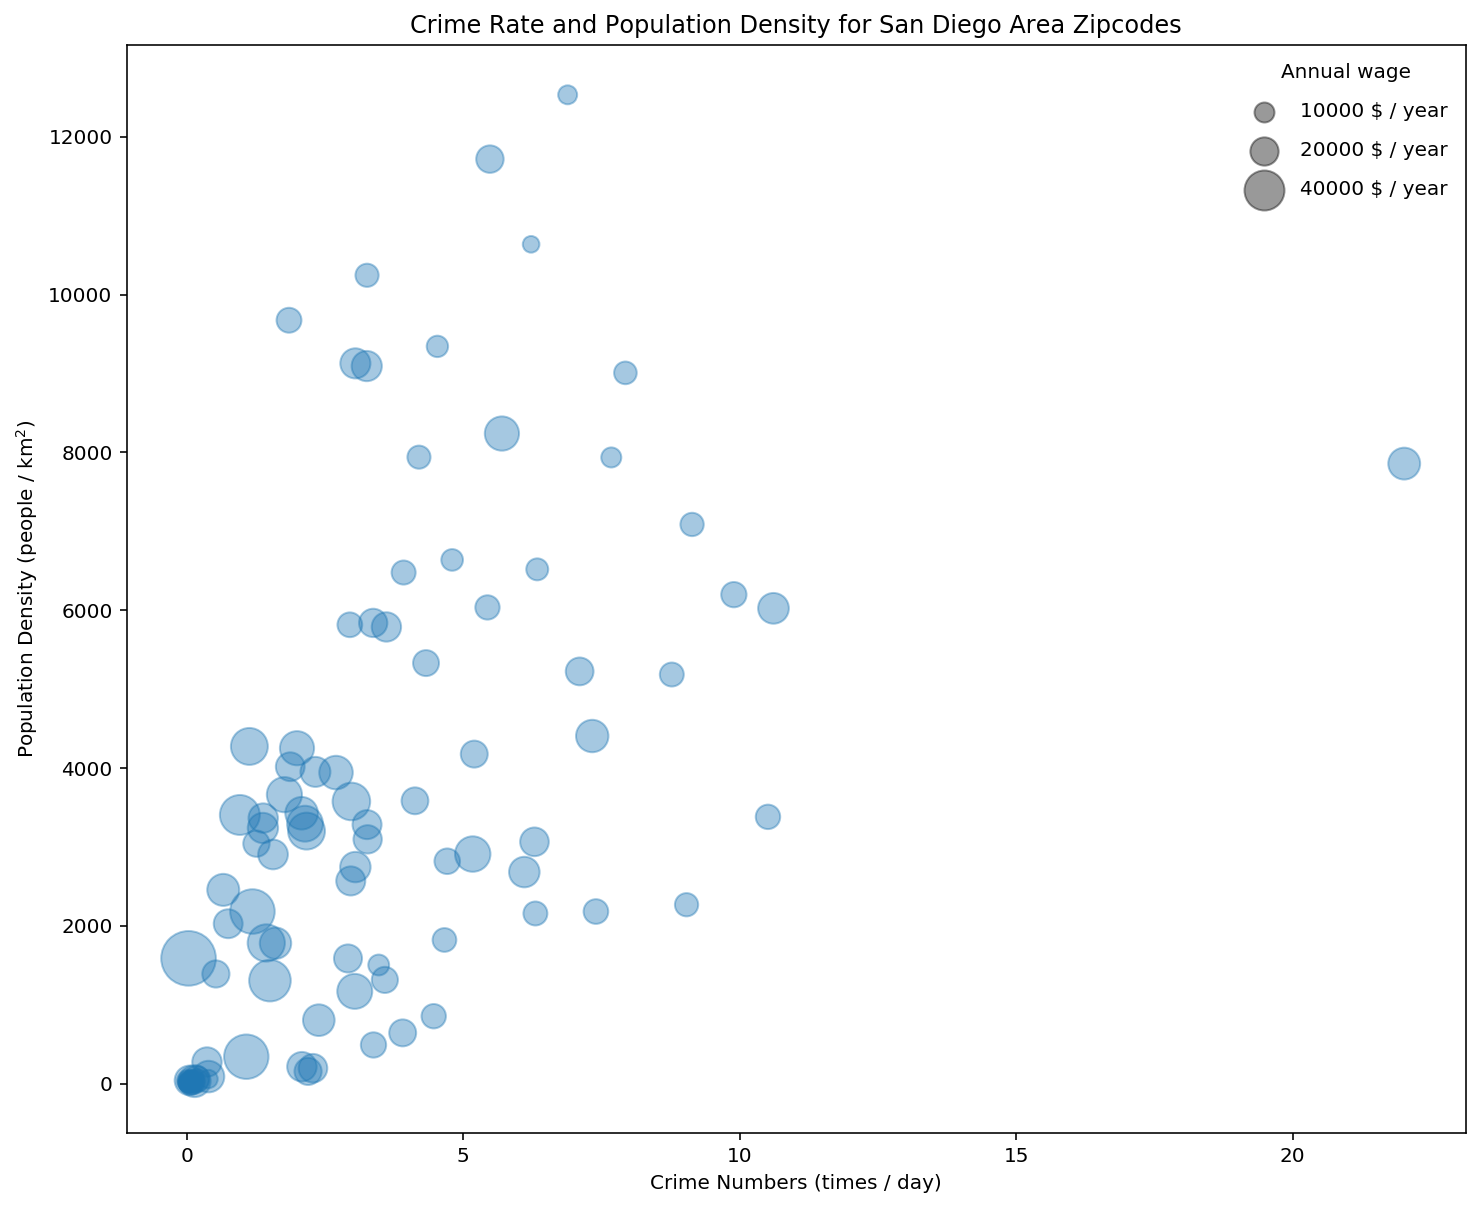

In [194]:
get_xy_crimeRate_popDensity(df)